<a href="https://colab.research.google.com/github/hannaharham/Sentiment-Analysis-SDG-UM/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Preparation

##1.1 : Data Integration : Merge both datasets

In [1]:
import pandas as pd

In [2]:
# Load Instagram OCR data
ig_df = pd.read_csv("instagram_confessions_ocr.csv")

# Load Google Form responses
survey_df = pd.read_csv("UM Student Responses - Form Responses 1.csv")

In [3]:
#inspect columns
print(ig_df.columns)
print(survey_df.columns)

Index(['image_name', 'raw_text'], dtype='object')
Index(['Timestamp', 'Which faculty are you from ',
       'What is your current year of study?',
       'Have you heard of the Sustainable Development Goals (SDGs) before?  ',
       'How would you rate your awareness of sustainability and SDGs? ',
       'Have you ever participated in any sustainability-related event/program at UM? ',
       'If yes, which type of event?  ',
       'How do you feel about UM's sustainability efforts on campus? (Good? Bad?  Enough/Not Enough? Why?) ',
       'Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)',
       'What do you think UM is doing WELL in terms of sustainability and SDG efforts?  (strengths)',
       'What areas do you think UM needs to IMPROVE to become a more sustainable campus?  ',
       'Do you feel sustainability and SDG elements are incorporated 

In [4]:
#prepare ig dataset
ig_clean = ig_df[["raw_text"]].copy()
ig_clean.rename(columns={"raw_text": "text"}, inplace=True)
ig_clean["source"] = "Instagram"
ig_clean.head()

,text,source
0,#UM019783\n\nUm bila nak buat esport centre. T...,Instagram
1,#UM019634\nAfter a few months aku kenal sorang...,Instagram
2,#UM019766\nU deserve someone better than him t...,Instagram
3,"#UM019787\n\nSaje jer nak cakap, fakulti medic...",Instagram
4,"#UM019748\n\nCeyy terpaling tegur orang lain, ...",Instagram


In [7]:
#check column names in survey csv
print(survey_df.columns.tolist())

['Timestamp', 'Which faculty are you from ', 'What is your current year of study?', 'Have you heard of the Sustainable Development Goals (SDGs) before?  ', 'How would you rate your awareness of sustainability and SDGs? ', 'Have you ever participated in any sustainability-related event/program at UM? ', 'If yes, which type of event?  ', "How do you feel about UM's sustainability efforts on campus? (Good? Bad?  Enough/Not Enough? Why?) ", 'Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)', 'What do you think UM is doing WELL in terms of sustainability and SDG efforts?  (strengths)', 'What areas do you think UM needs to IMPROVE to become a more sustainable campus?  ', 'Do you feel sustainability and SDG elements are incorporated into your LEARNING EXPERIENCE (e.g., lectures, coursework, activities)? Why or why not?  ', 'Any additional comments/suggestio

In [8]:
#Standardize column names (removes hidden spaces/newlines)
survey_df.columns = (
    survey_df.columns
    .astype(str)
    .str.replace(r"\s+", " ", regex=True)   # collapse weird whitespace/newlines
    .str.strip()                             # trim leading/trailing spaces
)

In [9]:
#recheck
print(survey_df.columns.tolist())

['Timestamp', 'Which faculty are you from', 'What is your current year of study?', 'Have you heard of the Sustainable Development Goals (SDGs) before?', 'How would you rate your awareness of sustainability and SDGs?', 'Have you ever participated in any sustainability-related event/program at UM?', 'If yes, which type of event?', "How do you feel about UM's sustainability efforts on campus? (Good? Bad? Enough/Not Enough? Why?)", 'Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)', 'What do you think UM is doing WELL in terms of sustainability and SDG efforts? (strengths)', 'What areas do you think UM needs to IMPROVE to become a more sustainable campus?', 'Do you feel sustainability and SDG elements are incorporated into your LEARNING EXPERIENCE (e.g., lectures, coursework, activities)? Why or why not?', 'Any additional comments/suggestions regarding s

In [10]:
#prepare survey dataset
open_ended_cols = [
    "If yes, which type of event?",
    "How do you feel about UM's sustainability efforts on campus? (Good? Bad? Enough/Not Enough? Why?)",
    "Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)",
    "What do you think UM is doing WELL in terms of sustainability and SDG efforts? (strengths)",
    "What areas do you think UM needs to IMPROVE to become a more sustainable campus?",
    "Do you feel sustainability and SDG elements are incorporated into your LEARNING EXPERIENCE (e.g., lectures, coursework, activities)? Why or why not?",
    "Any additional comments/suggestions regarding sustainability at UM?"
]


In [11]:
survey_long = survey_df[open_ended_cols] \
    .melt(value_name="text") \
    .dropna(subset=["text"])

survey_long["source"] = "Survey"

In [13]:
#merge survey + instagram
master_df = pd.concat([ig_clean, survey_long], ignore_index=True)

,text,source,variable
0,#UM019783\n\nUm bila nak buat esport centre. T...,Instagram,NaN
1,#UM019634\nAfter a few months aku kenal sorang...,Instagram,NaN
2,#UM019766\nU deserve someone better than him t...,Instagram,NaN
3,"#UM019787\n\nSaje jer nak cakap, fakulti medic...",Instagram,NaN
4,"#UM019748\n\nCeyy terpaling tegur orang lain, ...",Instagram,NaN


In [15]:
#remove variable column
master_df = master_df.drop(columns=["variable"], errors="ignore")
master_df.head()

,text,source
0,#UM019783\n\nUm bila nak buat esport centre. T...,Instagram
1,#UM019634\nAfter a few months aku kenal sorang...,Instagram
2,#UM019766\nU deserve someone better than him t...,Instagram
3,"#UM019787\n\nSaje jer nak cakap, fakulti medic...",Instagram
4,"#UM019748\n\nCeyy terpaling tegur orang lain, ...",Instagram


##1.2 : Data Cleaning

In [43]:
#confirm structure
master_df.info()
master_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 357 non-null    object
 1   source               357 non-null    object
 2   matched_keywords     357 non-null    object
 3   is_relevant          357 non-null    bool  
 4   is_relevant_refined  357 non-null    bool  
dtypes: bool(2), object(3)
memory usage: 11.9+ KB


,text,source,matched_keywords,is_relevant,is_relevant_refined
0,Um bila nak buat esport centre. Tengok ukm pun...,Instagram,[support],True,True
1,After a few months aku kenal sorang lelaki ni ...,Instagram,[],False,False
2,"U deserve someone better than him tbh, yes you...",Instagram,[kk*],True,False
3,"Saje jer nak cakap, fakulti medic tu ada cours...",Instagram,"[course, fakulti, it]",True,True
4,"Ceyy terpaling tegur orang lain, lahh rupanya ...",Instagram,[],False,False


In [44]:
#Drop empty & useless rows
# Remove rows where text is NaN
master_df = master_df.dropna(subset=["text"])

# Remove rows that are only spaces or very short
master_df["text"] = master_df["text"].astype(str).str.strip()
master_df = master_df[master_df["text"].str.len() > 10]

print("Rows after removing empty/junk:", len(master_df))

Rows after removing empty/junk: 357


In [45]:
#Remove OCR artefacts (hashtags, line breaks)
import re

def clean_basic(text):
    text = re.sub(r"#UM\d+", "", text)      # remove UM hashtags
    text = re.sub(r"\n+", " ", text)        # remove line breaks
    text = re.sub(r"\s+", " ", text)        # normalize spaces
    return text.strip()

master_df["text"] = master_df["text"].apply(clean_basic)
master_df.head()

,text,source,matched_keywords,is_relevant,is_relevant_refined
0,Um bila nak buat esport centre. Tengok ukm pun...,Instagram,[support],True,True
1,After a few months aku kenal sorang lelaki ni ...,Instagram,[],False,False
2,"U deserve someone better than him tbh, yes you...",Instagram,[kk*],True,False
3,"Saje jer nak cakap, fakulti medic tu ada cours...",Instagram,"[course, fakulti, it]",True,True
4,"Ceyy terpaling tegur orang lain, lahh rupanya ...",Instagram,[],False,False


In [46]:
#Filter for sustainability relevance
#Keyword-based relevance filter

keywords = [
    # Environment / waste / cleanliness
    "sustainability","sustainable","sdg","green","environment",
    "sampah","trash","rubbish","litter","waste",
    "bersih","kotor","dirty","clean",
    "bau","busuk","hapak","smell",
    "recycle","recycling","recyclable",
    "paper","plastic","bins","tong",
    "zero waste","campaign",
    "trees","planting","energy","water","electricity",
    "flood","cuaca","panas","weather",

    # Campus & facilities
    "campus","kolej","hostel","tandas","toilet",
    "parking","bus","transport","facility","facilities","maintenance","management",
    "wifi","internet","it","teknikal","website","system","maya",
    "library","cafe","kafe","bonggol",

    # Education / learning
    "education","learning","class","course","assignment","exam","result",
    "faculty","fac","fakulti","online","on9","hybrid","odl","register","registration",
    "staf","staff","lecturer",

    # Health / wellbeing / safety
    "health","healthy","stress","stres","ppum","klinik",
    "merokok","rokok","vape","smoking","harassment","safety","mental","wellbeing",

    # Cost / access
    "mahal","murah","harga","yuran","fees","zero balance policy","poverty","injustice",
    "part-time","job","work","sapu","rider",

    # Awareness / engagement
    "awareness","efforts","improve","support","initiative",
    "program","programme","event","forum","talk","volunteer","sukarelawan","project","projek",
]


In [65]:
# Define exclusion keywords
exclude_keywords = [
    "boyfriend","girlfriend","bf","gf", "him", "her",
    "ex","crush","situationship","hts",
    "dating","broke up","breakup","dump",
    "aku suka","aku cinta","cinta","suka",
    "rindu","sayang",
    "curang","cheat","selingkuh",
    "couple","relationship",
    "hormone","perasaan"
]

In [48]:
#define anchor keywords
anchor_keywords = [
    "sdg","sustainability","sustainable","environment",
    "recycle","recycling","waste","zero waste","green",
    "sampah","litter","plastic","paper","bin","bins",
    "energy","water","flood","banjir"
]

In [49]:
#Special patterns (handles KK10, kk12, KK8 etc.)
kk_pattern = re.compile(r"\bkk\d*\b", re.IGNORECASE)

In [66]:
#record which keywords matched each row
def matched_keywords(text: str):
    t = str(text).lower()
    matches = [k for k in keywords if k in t]
    if kk_pattern.search(text):
        matches.append("kk*")
    return sorted(set(matches))

master_df["matched_keywords"] = master_df["text"].apply(matched_keywords)

In [67]:
#final relevance logic
def is_relevant_refined(text: str) -> bool:
    t = str(text).lower()

    has_inclusion = any(k in t for k in keywords) or (kk_pattern.search(text) is not None)
    has_anchor = any(a in t for a in anchor_keywords)
    has_exclusion = any(e in t for e in exclude_keywords)

    # If it has strong sustainability anchor → keep
    if has_anchor:
        return True

    # Otherwise apply normal rule
    return bool(has_inclusion and not has_exclusion)

In [68]:
master_df["is_relevant_refined"] = master_df["text"].apply(is_relevant_refined)
print(master_df["is_relevant_refined"].value_counts())

is_relevant_refined
True     229
False    128
Name: count, dtype: int64


In [70]:
#check
print("\nSample TRUE (kept):")
display(master_df[master_df["is_relevant_refined"] == True][["source","text","matched_keywords"]].sample(10, random_state=42))


Sample TRUE (kept):


,source,text,matched_keywords
414,Survey,yes but not much in it,[it]
136,Instagram,JTK atau staff KK6 ni boleh tak toloooong chec...,"[bus, it, kk*, parking, ppum, staf, staff]"
19,Instagram,"Dah nak habis sem dah pun, nothing's change. M...","[it, kk*, mental, sampah, tong]"
380,Survey,UM need to plant more trees since some areas a...,"[bins, it, trees]"
29,Instagram,pak con tolong post ni.. kepada penculik anak ...,"[cafe, it, kk*, staf, staff]"
389,Survey,expand green infrastructures,[green]
49,Instagram,gais ada sesiapa tahu tak this upcoming sem ni...,"[it, yuran, zero balance policy]"
382,Survey,college and faculties,[fac]
318,Survey,kk3 had handled some campaigns,"[campaign, kk*]"
256,Survey,AquaRover Launching (SDG 14),[sdg]


In [71]:
#check
print("\nSample FALSE (removed):")
display(master_df[master_df["is_relevant_refined"] == False][["source","text"]].sample(10, random_state=42))


Sample FALSE (removed):


,source,text
115,Instagram,Result exam kluar bila ya? Sbb daftar subjek p...
88,Instagram,"aa) Min tolongla post ni, teguran utk budak2 y..."
41,Instagram,"finally ada jugak orang expose atiq , yg backu..."
67,Instagram,when masdo sang berduka lara all i think about...
205,Instagram,"The thing about cafe kk3 is that, the rude of ..."
116,Instagram,Can we all students come together to report th...
144,Instagram,Comments afridin_17 6h Typical men's life like...
223,Instagram,an) at Macam biasa permasa dgn kroni berpisah ...
170,Instagram,Get the chance to talk with this humble guy. E...
53,Instagram,FRENSTER nih singkatan untuk ‘Festival Standby...


In [72]:
final_text_df = master_df[master_df["is_relevant_refined"] == True].copy()

# Keep only essential columns
final_text_df = final_text_df[["source", "text"]].copy()

# Reset index and add ID
final_text_df.reset_index(drop=True, inplace=True)
final_text_df.insert(0, "id", range(1, len(final_text_df) + 1))

final_text_df.head()

,id,source,text
0,1,Instagram,Um bila nak buat esport centre. Tengok ukm pun...
1,2,Instagram,"Saje jer nak cakap, fakulti medic tu ada cours..."
2,3,Instagram,> UMSU Law yall dont want to do anything about...
3,4,Instagram,¢Tak nampak satu pun unsur dan cubaan untuk me...
4,5,Instagram,"Heads up, mungkin UM boleh buat sistem maya ni..."


In [73]:
final_text_df.to_csv(
    "master_text_dataset_final.csv",
    index=False,
    encoding="utf-8"
)

print("Saved final dataset with", len(final_text_df), "rows")

Saved final dataset with 229 rows


In [74]:
from google.colab import files
files.download("master_text_dataset_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2) EDA

##2.1 : Survey EDA

In [55]:
import pandas as pd

survey_df = pd.read_csv("UM Student Responses - Form Responses 1.csv")
survey_df.head()

,Timestamp,Which faculty are you from,What is your current year of study?,Have you heard of the Sustainable Development Goals (SDGs) before?,How would you rate your awareness of sustainability and SDGs?,Have you ever participated in any sustainability-related event/program at UM?,"If yes, which type of event?",How do you feel about UM's sustainability efforts on campus? (Good? Bad? Enough/Not Enough? Why?),"Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)",What do you think UM is doing WELL in terms of sustainability and SDG efforts? (strengths),What areas do you think UM needs to IMPROVE to become a more sustainable campus?,"Do you feel sustainability and SDG elements are incorporated into your LEARNING EXPERIENCE (e.g., lectures, coursework, activities)? Why or why not?",Any additional comments/suggestions regarding sustainability at UM?
0,11/17/2025 18:47:36,Faculty of Computer Science & Information Tech...,Year 3,Yes,2,No,-,Bad,No,They have recycle bin,Education,No,UM needs to do more program
1,11/17/2025 18:48:12,Faculty of Computer Science & Information Tech...,Year 2,Yes,4,Yes,recyclable event,not enough theres no much event focusing on sdg,Yes it qas good knew knowledge gain especially...,Enhancing the use of paper cup and packaging b...,put more recyclable bins and enforce student t...,yes we use it in our project managemnet it mak...,No
2,11/17/2025 18:48:18,Faculty of Computer Science & Information Tech...,Year 3,Yes,4,Yes,Environment day,"UM’s sustainability efforts are good, but not ...","Yes, I joined Environemy Day and a few awarene...",UM is doing well in raising awareness about su...,"UM needs to improve waste management, especial...","Yes, I feel that sustainability and SDG elemen...",NaN
3,11/17/2025 18:57:52,Faculty of Medicine,Year 3,Yes,2,No,-,Not Enough,No,Moderate,Promotions or Campaigns,Yea but not enough because some might not be r...,Increase awareness among students and staffs
4,11/17/2025 18:59:47,Faculty of Computer Science & Information Tech...,Year 3,Yes,4,No,-,"Enough, there is still some sustainability pro...",No,UM is active in campus sustainability initiati...,Improve campus awareness of SDG practices amon...,"Yes, but only to a certain extent. Some projec...",Build a reward system to encourage um staff an...


In [56]:
#check columns (identify question types)
survey_df.columns.tolist()

['Timestamp',
 'Which faculty are you from ',
 'What is your current year of study?',
 'Have you heard of the Sustainable Development Goals (SDGs) before?  ',
 'How would you rate your awareness of sustainability and SDGs? ',
 'Have you ever participated in any sustainability-related event/program at UM? ',
 'If yes, which type of event?  ',
 "How do you feel about UM's sustainability efforts on campus? (Good? Bad?  Enough/Not Enough? Why?) ",
 'Have you joined any SUSTAINABILITY ACTIVITY/INITIATIVES in UM? How was your experience? (eg : recycling programs, awareness campaigns, energy-saving practices, or any SDG-related events)',
 'What do you think UM is doing WELL in terms of sustainability and SDG efforts?  (strengths)',
 'What areas do you think UM needs to IMPROVE to become a more sustainable campus?  ',
 'Do you feel sustainability and SDG elements are incorporated into your LEARNING EXPERIENCE (e.g., lectures, coursework, activities)? Why or why not?  ',
 'Any additional commen

In [57]:
#convert scale responses from string to numeric
survey_df["How would you rate your awareness of sustainability and SDGs? "] = pd.to_numeric(
    survey_df["How would you rate your awareness of sustainability and SDGs? "], errors="coerce"
)

In [58]:
#descriptive statistics
survey_df["How would you rate your awareness of sustainability and SDGs? "].describe()

,How would you rate your awareness of sustainability and SDGs?
count,32.000000
mean,3.437500
std,1.014015
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


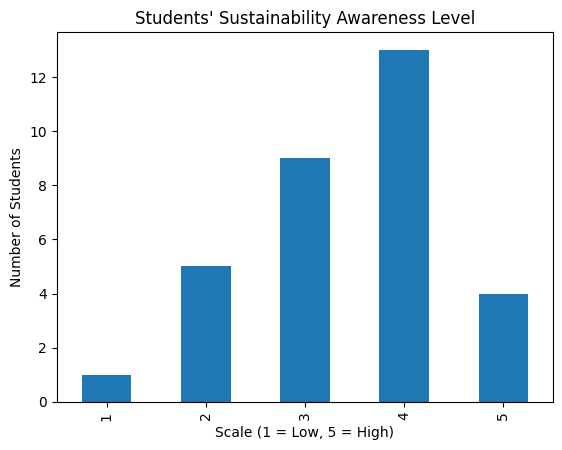

In [59]:
#visualize likert-scale questions
import matplotlib.pyplot as plt

survey_df["How would you rate your awareness of sustainability and SDGs? "].value_counts().sort_index().plot(
    kind="bar"
)
plt.xlabel("Scale (1 = Low, 5 = High)")
plt.ylabel("Number of Students")
plt.title("Students' Sustainability Awareness Level")
plt.show()

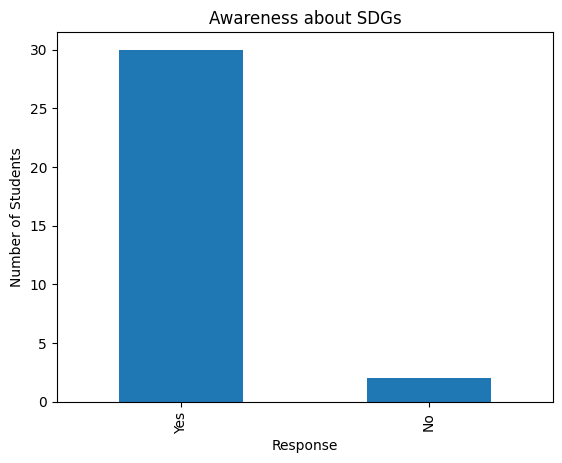

In [62]:
#Visualise categorical questions (yes/no)
survey_df["Have you heard of the Sustainable Development Goals (SDGs) before?  "].value_counts().plot(
    kind="bar"
)
plt.xlabel("Response")
plt.ylabel("Number of Students")
plt.title("Awareness about SDGs")
plt.show()

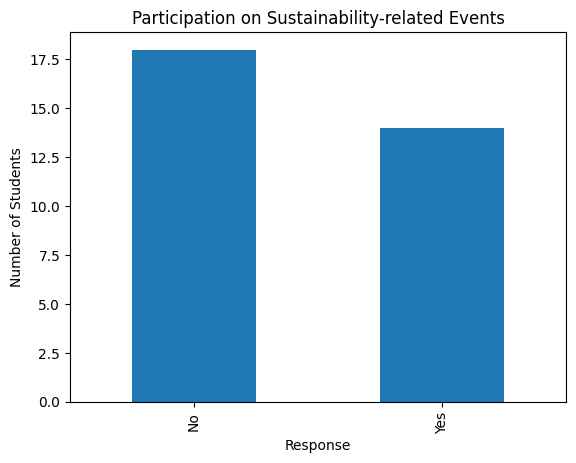

In [63]:
survey_df["Have you ever participated in any sustainability-related event/program at UM? "].value_counts().plot(
    kind="bar"
)
plt.xlabel("Response")
plt.ylabel("Number of Students")
plt.title("Participation on Sustainability-related Events")
plt.show()

##2.2 : Text EDA

In [75]:
import pandas as pd

text_df = pd.read_csv("master_text_dataset_final.csv")
text_df.head()

,id,source,text
0,1,Instagram,Um bila nak buat esport centre. Tengok ukm pun...
1,2,Instagram,"Saje jer nak cakap, fakulti medic tu ada cours..."
2,3,Instagram,> UMSU Law yall dont want to do anything about...
3,4,Instagram,¢Tak nampak satu pun unsur dan cubaan untuk me...
4,5,Instagram,"Heads up, mungkin UM boleh buat sistem maya ni..."


In [76]:
len(text_df)

229

In [77]:
text_df["source"].value_counts()

,count
source,
Instagram,120
Survey,109


<Axes: xlabel='source'>

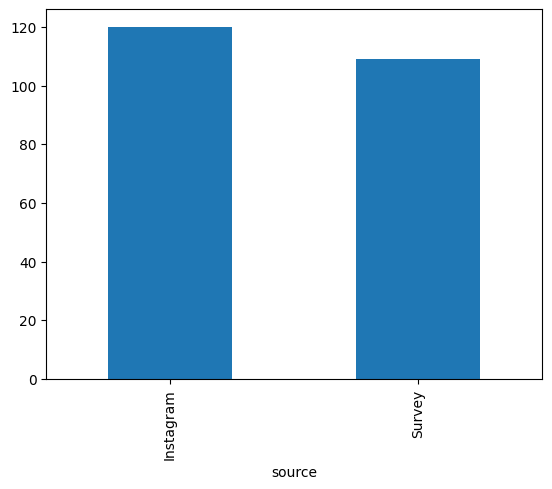

In [78]:
text_df["source"].value_counts().plot(kind="bar")

In [82]:
#text length analysis
text_df["text_length"] = text_df["text"].str.len()
text_df["text_length"].describe()

,text_length
count,229.000000
mean,230.336245
std,225.269771
min,12.000000
25%,63.000000
50%,148.000000
75%,320.000000
max,974.000000


<Axes: ylabel='Frequency'>

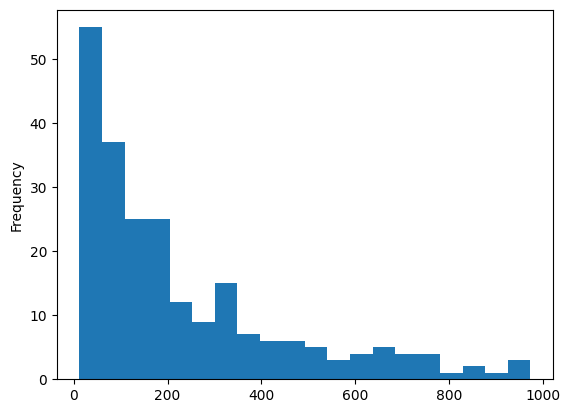

In [84]:
text_df["text_length"].plot(kind="hist", bins=20)

In [86]:
#What words appear most often
from collections import Counter

all_words = " ".join(text_df["text"]).split()
Counter(all_words).most_common(20)

[('and', 108),
 ('nak', 100),
 ('yang', 95),
 ('ni', 87),
 ('tak', 86),
 ('the', 84),
 ('to', 82),
 ('of', 52),
 ('tu', 51),
 ('je', 51),
 ('la', 48),
 ('ada', 45),
 ('in', 41),
 ('buat', 40),
 ('UM', 40),
 ('macam', 39),
 ('dah', 37),
 ('ke', 35),
 ('a', 34),
 ('yg', 34)]

In [106]:
#malay stopwords to be removed
malay_stopwords = {
    "yang","dan","atau","tapi","pun","dalam","dengan","untuk","pada",
    "ini","itu","ada","tak","tidak","dah","sudah","nak","buat","boleh",
    "macam","orang","dia","aku","kau","kita","kami","mereka",
    "saya","you","u","lah","je","jg","kan","ke","kat","ni","tu",
    "sebab","kerana","bila","kalau","sbb","tp","pd","dlm", "bukan","apa","je","lagi","memang","jadi","kena",
    "kalau","sampai","dekat","dari","time","tahu", "kalau", "takde", "lain", "semua","mcm", "Aku", "punya"
}

In [107]:
#Combine English + Malay stopwords
from nltk.corpus import stopwords

english_stopwords = set(stopwords.words("english"))
all_stopwords = english_stopwords.union(malay_stopwords)

In [108]:
#re-run
filtered_words = [
    w for w in all_words
    if w not in all_stopwords and len(w) > 2
]

from collections import Counter
Counter(filtered_words).most_common(20)

[('sustainability', 22),
 ('kelas', 19),
 ('lepas', 18),
 ('anak', 18),
 ('SDG', 18),
 ('je.', 16),
 ('student', 15),
 ('Kalau', 15),
 ('balik', 15),
 ('online', 14),
 ('program', 14),
 ('students', 14),
 ('tolong', 13),
 ('tahun', 13),
 ('cuti', 13),
 ('mana', 13),
 ('belajar', 13),
 ('isu', 12),
 ('puasa', 12),
 ('sampah', 12)]

In [109]:
#wordcloud
!pip install wordcloud

In [112]:
text_for_wc = " ".join(filtered_words)

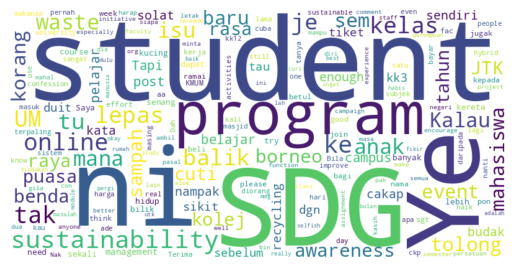

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False
).generate(text_for_wc)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()